In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv

--2025-03-26 21:14:46--  https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv [following]
--2025-03-26 21:14:46--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195955 (191K) [text/plain]
Saving to: ‘framingham.csv’

framingham.csv      100%[===================>] 191.36K  --.-KB/s    in 0.01s   

2025-03-26 21:14:46 (14.8 MB/s) - ‘framingham.csv’ save

## LOGISTIC REGRESSION - HEART DISEASE PREDICTION

###Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

###Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

###Demographic:
    • Sex: male or female(Nominal)
    • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    Behavioral
    • Current Smoker: whether or not the patient is a current smoker (Nominal)
    • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
###Medical( history)
    • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    • Diabetes: whether or not the patient had diabetes (Nominal)
###Medical(current)
    • Tot Chol: total cholesterol level (Continuous)
    • Sys BP: systolic blood pressure (Continuous)
    • Dia BP: diastolic blood pressure (Continuous)
    • BMI: Body Mass Index (Continuous)
    • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    • Glucose: glucose level (Continuous)
    Predict variable (desired target)
    • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


### Cargar Datos

In [2]:
import pandas as pd
data = pd.read_csv("framingham.csv")

In [3]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Descriptiva

#### Cuantos datos tiene la tabla

In [10]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.shape


(4238, 16)

#### Medidas de tendencia central de las variables.

In [5]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### Grafico de Barras con el número de hombres y mujeres

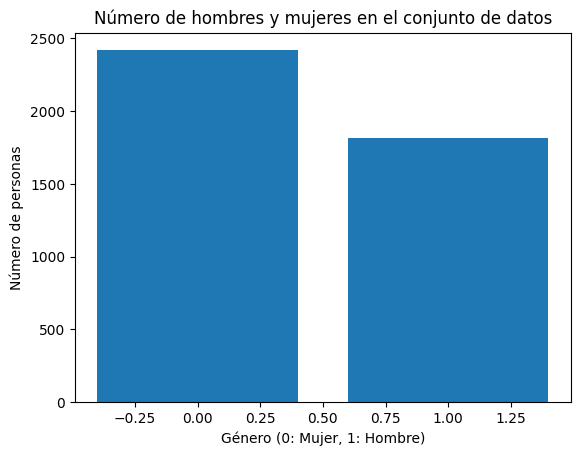

In [16]:
import matplotlib.pyplot as plt
conteo_genero = data['male'].value_counts()
plt.bar(conteo_genero.index, conteo_genero.values)

plt.xlabel('Género (0: Mujer, 1: Hombre)')
plt.ylabel('Número de personas')
plt.title('Número de hombres y mujeres en el conjunto de datos')
plt.show()

#### Realice un ggrafico de Barras de TenYearCHD

*   Elemento de lista
*   Elemento de lista



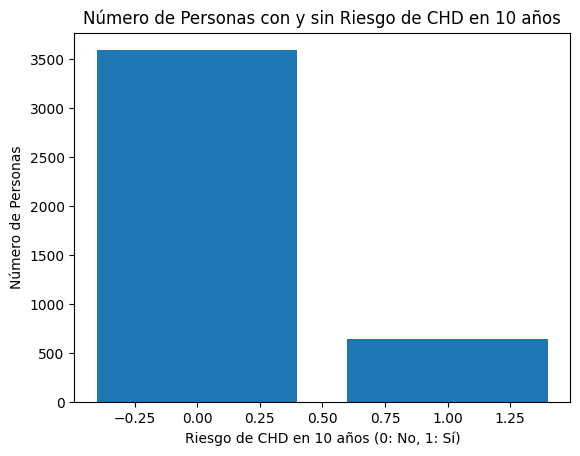

In [18]:
chd_counts = data['TenYearCHD'].value_counts()

plt.bar(chd_counts.index, chd_counts.values)

plt.xlabel('Riesgo de CHD en 10 años (0: No, 1: Sí)')
plt.ylabel('Número de Personas')
plt.title('Número de Personas con y sin Riesgo de CHD en 10 años')

plt.show()


#### Realice un grafico de densidad del BMI

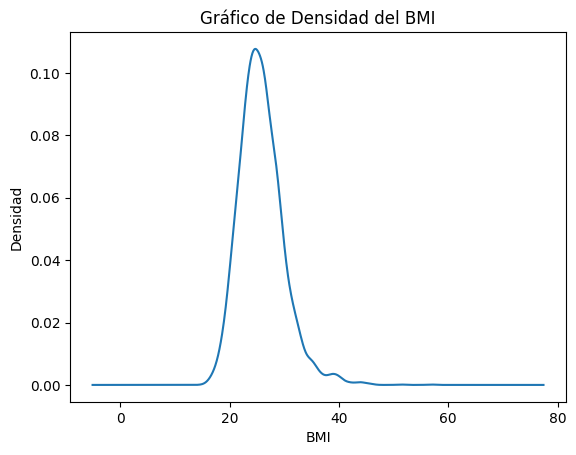

In [19]:
data['BMI'].plot(kind='kde')
plt.xlabel('BMI')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad del BMI')
plt.show()


#### Realice un grafico de densidad del BMI que diferencie entre hombres y mujeres, ¿Cual tiene en promedio mayor BMI?

<ipython-input-25-1a05c198708d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['male'] == 0]['BMI'], label='Mujeres', shade=True)
<ipython-input-25-1a05c198708d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['male'] == 1]['BMI'], label='Hombres', shade=True)


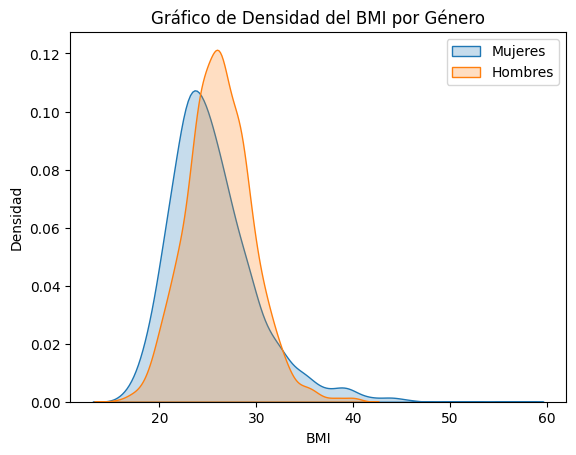

In [25]:
import seaborn as sns
sns.kdeplot(data[data['male'] == 0]['BMI'], label='Mujeres', shade=True)
sns.kdeplot(data[data['male'] == 1]['BMI'], label='Hombres', shade=True)

plt.xlabel('BMI')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad del BMI por Género')
plt.legend()
plt.show()

bmi_mujeres = data[data['male'] == 0]['BMI'].mean()
bmi_hombres = data[data['male'] == 1]['BMI'].mean()

In [26]:
promedio_bmi_hombres = hombres['BMI'].mean()
promedio_bmi_mujeres = mujeres['BMI'].mean()

print(f"Promedio del BMI para hombres: {promedio_bmi_hombres:.2f}")
print(f"Promedio del BMI para mujeres: {promedio_bmi_mujeres:.2f}")

if promedio_bmi_hombres > promedio_bmi_mujeres:
  print("Los hombres tienen en promedio un mayor BMI.")
else:
  print("Las mujeres tienen en promedio un mayor BMI.")


Promedio del BMI para hombres: 26.19
Promedio del BMI para mujeres: 25.51
Los hombres tienen en promedio un mayor BMI.


#### Realice un mapa de calor entre las variables (heatmap) y diga cual es el par de variables más correlacionadas. Recuerde que para sacar la correlacion puede usar data.corr()

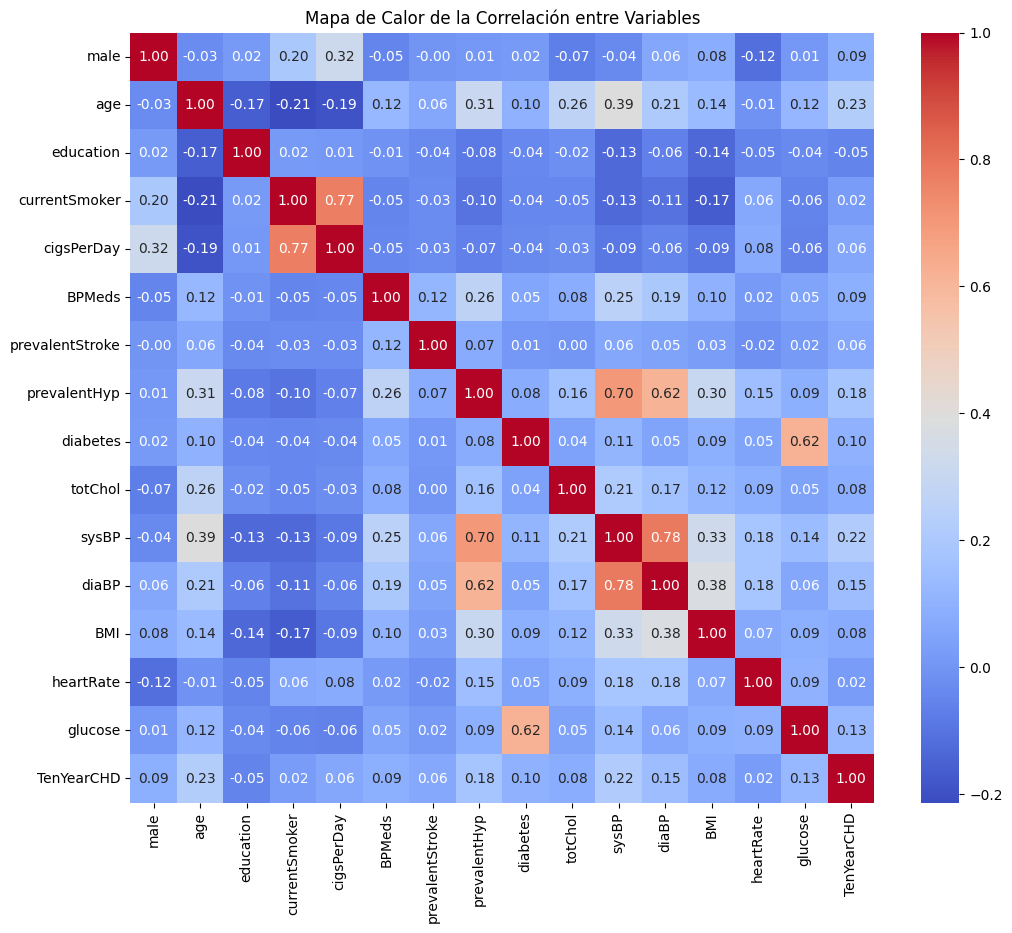

In [27]:
import matplotlib.pyplot as plt
import numpy as np

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Correlación entre Variables')
plt.show()


In [28]:
correlation_matrix = correlation_matrix.abs()
correlation_matrix.values[[np.arange(correlation_matrix.shape[0])]*2]
max_correlation = correlation_matrix.max().max()
row_max, col_max = correlation_matrix.stack().idxmax()

print(f"El par de variables más correlacionadas es: {row_max} y {col_max}, con una correlación de {max_correlation:.2f}")

El par de variables más correlacionadas es: male y male, con una correlación de 1.00


¿Haga un boxplot por genero para cada una de estas tres variables :BMI,	heartRate y	glucose.¿hay outliers ?

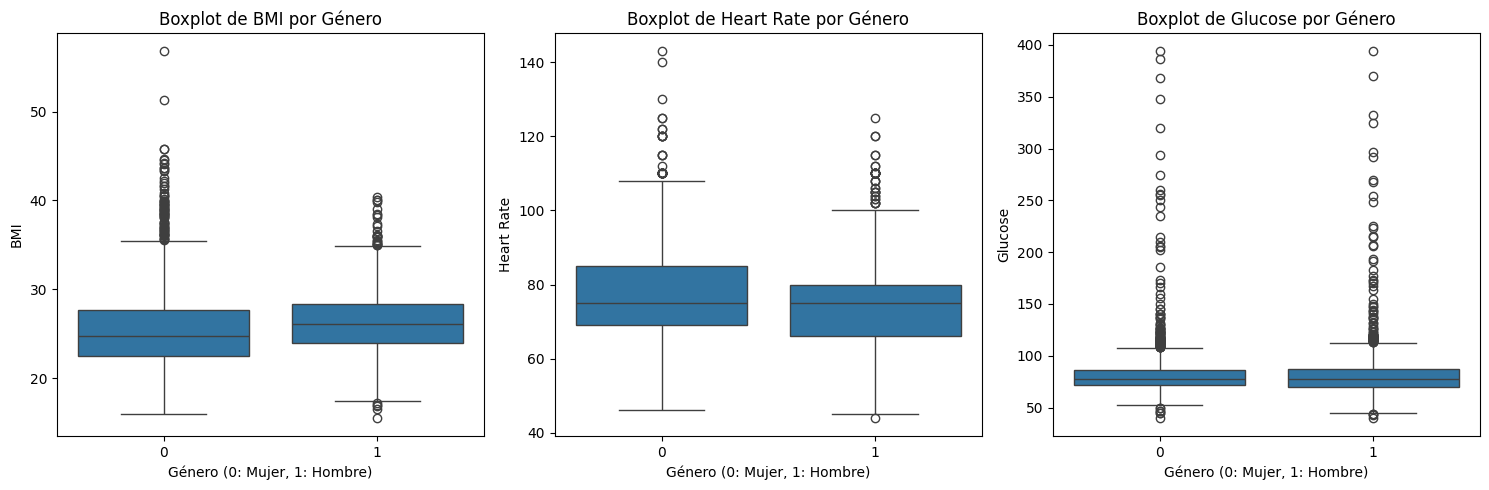

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x='male', y='BMI', data=data, ax=axes[0])
axes[0].set_xlabel('Género (0: Mujer, 1: Hombre)')
axes[0].set_ylabel('BMI')
axes[0].set_title('Boxplot de BMI por Género')

sns.boxplot(x='male', y='heartRate', data=data, ax=axes[1])
axes[1].set_xlabel('Género (0: Mujer, 1: Hombre)')
axes[1].set_ylabel('Heart Rate')
axes[1].set_title('Boxplot de Heart Rate por Género')

sns.boxplot(x='male', y='glucose', data=data, ax=axes[2])
axes[2].set_xlabel('Género (0: Mujer, 1: Hombre)')
axes[2].set_ylabel('Glucose')
axes[2].set_title('Boxplot de Glucose por Género')

plt.tight_layout()
plt.show()

### Manipulación de Datos

#### De cada variable cuente cuantos datos nulos hay

In [30]:
null_counts = data.isnull().sum()
null_counts

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


#### Utilice dropna para borrar los datos faltantes ¿cuantos datos quedan ?

In [31]:
data_cleaned = data.dropna()
print(f"Después de borrar los datos faltantes, quedan {data_cleaned.shape[0]} datos.")


Después de borrar los datos faltantes, quedan 3656 datos.


#### Seleccione sus variables X y su variable y

In [32]:
X = data_cleaned[['age', 'male', 'currentSmoker', 'cigsPerDay', 'BPMeds',
                 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
                 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

In [33]:
y = data_cleaned['TenYearCHD']

#### Divida aleatoriamente la tabla en test y train, dejando el 30% de los datos para test y usando un random state de 123.
1. ¿De que tamaño queda cada dataset?

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(f"Tamaño del dataset de entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño del dataset de prueba: {X_test.shape[0]} filas")


Tamaño del dataset de entrenamiento: 2559 filas
Tamaño del dataset de prueba: 1097 filas


#### Entrene el modelo de Regresion logistica usando datos de entrenamiento

In [38]:
from sklearn.linear_model import LogisticRegression

# Crear instancia del modelo con ponderación de clases
# logreg = LogisticRegression(class_weight='balanced')
logreg = LogisticRegression()

# Ajustar el modelo a tus datos
logreg.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Imprima los coeficientes y diga cual tiene un efecto mayor sobre desarrollar una enfermedad cardiaca

In [39]:
import numpy as np

coefficients = logreg.coef_[0]
feature_names = X.columns

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

max_coef_index = np.argmax(np.abs(coefficients))
feature_with_max_effect = feature_names[max_coef_index]
max_coef = coefficients[max_coef_index]

print(f"\nLa característica con el mayor efecto sobre desarrollar una enfermedad cardiaca es: {feature_with_max_effect} (coeficiente: {max_coef:.4f})")



age: 0.0318
male: 0.4368
currentSmoker: -0.2454
cigsPerDay: 0.0262
BPMeds: 0.1217
prevalentStroke: 0.0937
prevalentHyp: 0.8678
diabetes: 0.1685
totChol: -0.0012
sysBP: 0.0160
diaBP: -0.0325
BMI: -0.0423
heartRate: -0.0273
glucose: 0.0046

La característica con el mayor efecto sobre desarrollar una enfermedad cardiaca es: prevalentHyp (coeficiente: 0.8678)


#### Usando los datos de test calcule la matriz de confusión, el accuracy, el recall, la precision y el f1-score.

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

Matriz de Confusión:
[[915   3]
 [173   6]]


In [42]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud (Accuracy): {accuracy:.4f}")

Exactitud (Accuracy): 0.8396


In [43]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.0335


In [44]:
precision = precision_score(y_test, y_pred)
print(f"Precisión (Precision): {precision:.4f}")

Precisión (Precision): 0.6667


In [45]:
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

F1-score: 0.0638


#### Pinte la curva ROC, y saque el valor, busque en internet como interpretarla e interprete

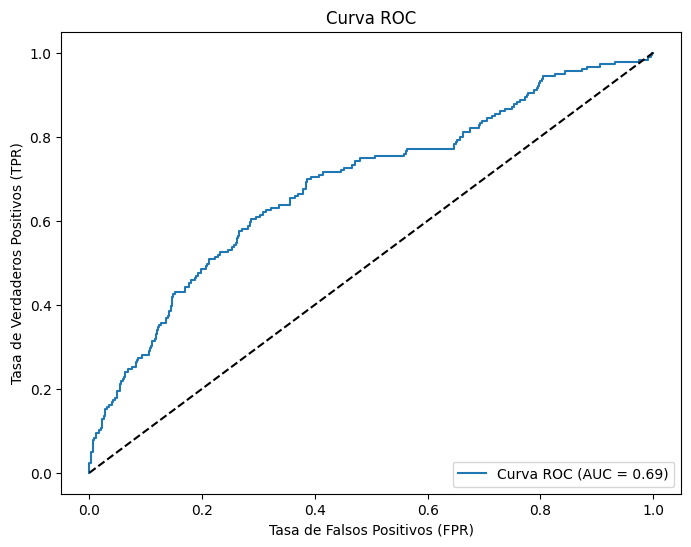

El valor del AUC es: 0.6860


In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = logreg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

print(f"El valor del AUC es: {auc:.4f}")



## Corrección desbalance de clases
1. Busque la funcion train_test_split en su codigo y agregue la opcion stratify  = y . Por que esto ayudaría con el desblance?
2. usando from imblearn.over_sampling import SMOTE mejore el performance
 3. Saque todo el modelo y la matriz y la grafica de ROC AUC

In [49]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 427.9555555555555, 'Predicted label')

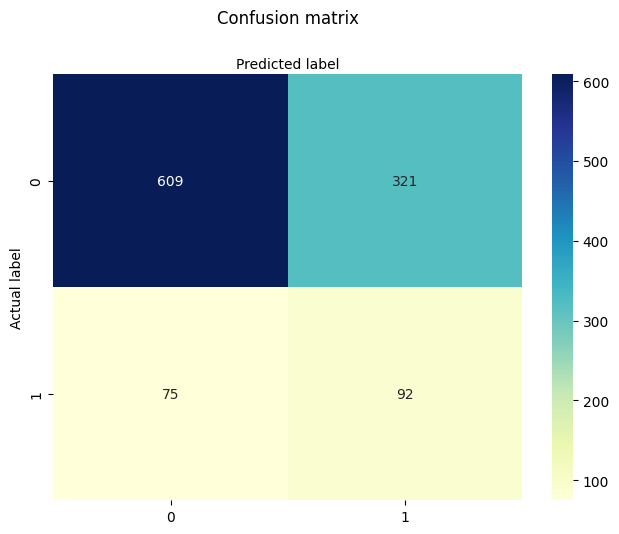

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,stratify=y, random_state=42)

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

logreg_smote = LogisticRegression()
logreg_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = logreg_smote.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred_smote)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

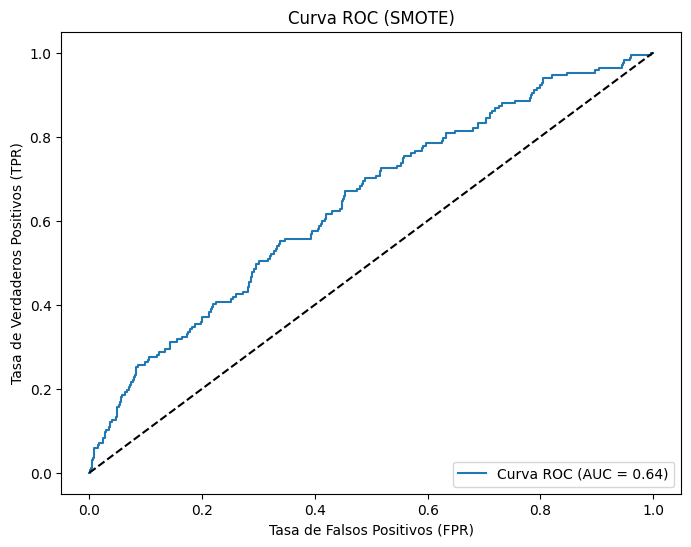


AUC (SMOTE): 0.6417


In [52]:
y_pred_proba_smote = logreg_smote.predict_proba(X_test)[:, 1]
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_pred_proba_smote)
auc_smote = roc_auc_score(y_test, y_pred_proba_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, label='Curva ROC (AUC = %0.2f)' % auc_smote)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC (SMOTE)')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC (SMOTE): {auc_smote:.4f}")


## Pinter el resultado con SMOTE y sin SMOTE

In [55]:
print("\nResultados con SMOTE:")
accuracy_smote = accuracy_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)

print(f"Exactitud (Accuracy): {accuracy_smote:.4f}")
print(f"Recall: {recall_smote:.4f}")
print(f"Precisión (Precision): {precision_smote:.4f}")
print(f"F1-score: {f1_smote:.4f}")
print(f"AUC (SMOTE): {auc_smote:.4f}")


Resultados con SMOTE:
Exactitud (Accuracy): 0.6390
Recall: 0.5509
Precisión (Precision): 0.2228
F1-score: 0.3172
AUC (SMOTE): 0.6417


In [56]:
print("Resultados sin SMOTE:")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Resultados sin SMOTE:
Exactitud (Accuracy): 0.8396
Recall: 0.0335
Precisión (Precision): 0.6667
F1-score: 0.0638
AUC: 0.6860


### Como mejora su modelo con StandardScaler()

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [58]:
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

logreg_scaled = LogisticRegression()

logreg_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = logreg_scaled.predict(X_test_scaled)

cm_scaled = confusion_matrix(y_test, y_pred_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
recall_scaled = recall_score(y_test, y_pred_scaled)
precision_scaled = precision_score(y_test, y_pred_scaled)
f1_scaled = f1_score(y_test, y_pred_scaled)

y_pred_proba_scaled = logreg_scaled.predict_proba(X_test_scaled)[:, 1]
auc_scaled = roc_auc_score(y_test, y_pred_proba_scaled)


print("\nResultados con StandardScaler():")
print(f"Exactitud (Accuracy): {accuracy_scaled:.4f}")
print(f"Recall: {recall_scaled:.4f}")
print(f"Precisión (Precision): {precision_scaled:.4f}")
print(f"F1-score: {f1_scaled:.4f}")
print(f"AUC: {auc_scaled:.4f}")


Resultados con StandardScaler():
Exactitud (Accuracy): 0.8569
Recall: 0.0898
Precisión (Precision): 0.7500
F1-score: 0.1604
AUC: 0.7541


### Pinte todas las graficas original SMOTE y SMOTE Scaler

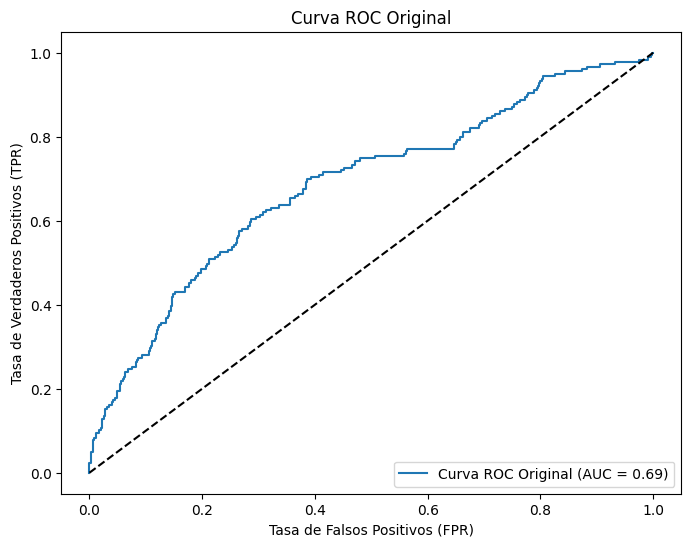

In [59]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC Original (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Original')
plt.legend(loc="lower right")
plt.show()


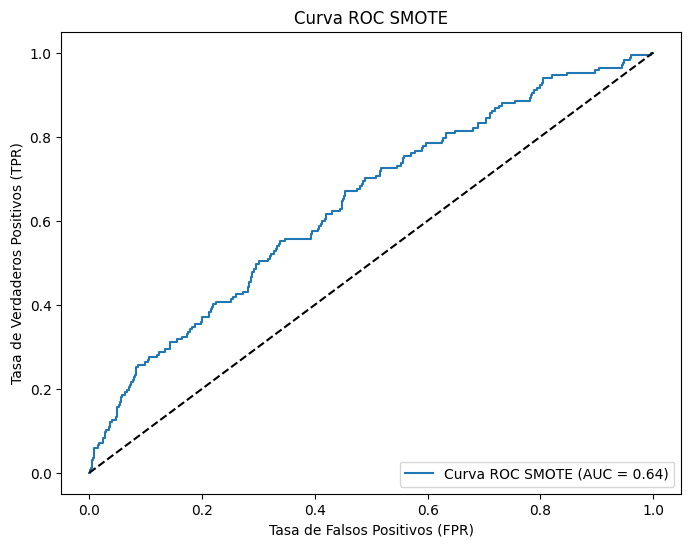

In [60]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, label='Curva ROC SMOTE (AUC = %0.2f)' % auc_smote)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC SMOTE')
plt.legend(loc="lower right")
plt.show()

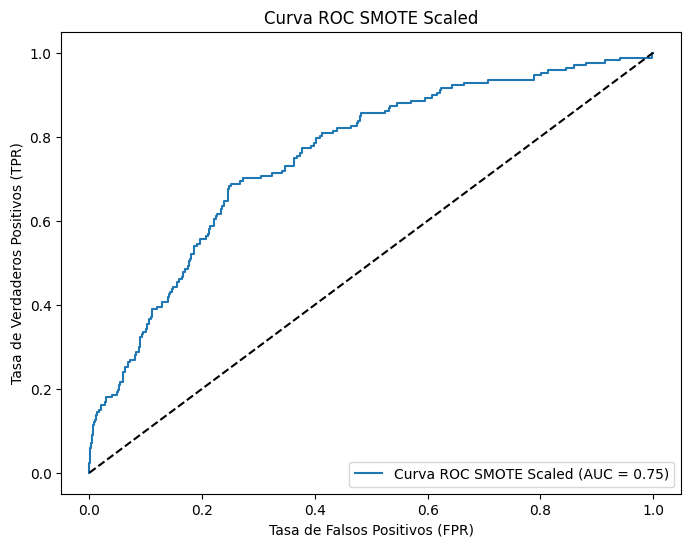

In [62]:
y_pred_proba_smote_scaled = logreg_scaled.predict_proba(X_test_scaled)[:, 1]
fpr_smote_scaled, tpr_smote_scaled, thresholds_smote_scaled = roc_curve(y_test, y_pred_proba_smote_scaled)
auc_smote_scaled = roc_auc_score(y_test, y_pred_proba_smote_scaled)

plt.figure(figsize=(8, 6))
plt.plot(fpr_smote_scaled, tpr_smote_scaled, label='Curva ROC SMOTE Scaled (AUC = %0.2f)' % auc_smote_scaled)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC SMOTE Scaled')
plt.legend(loc="lower right")
plt.show()